# Boston House Prices Prediction using KNN

In [3]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/boston.csv')

In [5]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_tr)
X_te_sc = scaler.transform(X_te)

In [8]:
k_vals = range(1, 31)
cv_errs = []

In [9]:
for k in k_vals:
    knn = KNeighborsRegressor(n_neighbors=k)
    mse_scores = cross_val_score(knn, X_tr_sc, y_tr, cv=10, scoring='neg_mean_squared_error')
    cv_errs.append(-mse_scores.mean())

In [10]:
# Find optimal k
opt_k_idx = np.argmin(cv_errs)
opt_k = k_vals[opt_k_idx]
print(f"Optimal k: {opt_k}")

Optimal k: 3


In [11]:
# Train k-NN model
knn_best = KNeighborsRegressor(n_neighbors=opt_k)
knn_best.fit(X_tr_sc, y_tr)

KNeighborsRegressor(n_neighbors=3)

In [12]:
# Predictions
y_tr_pred = knn_best.predict(X_tr_sc)
y_te_pred = knn_best.predict(X_te_sc)

#E_in
ein_mae = mean_absolute_error(y_tr, y_tr_pred)
ein_mse = mean_squared_error(y_tr, y_tr_pred)
ein_rmse = np.sqrt(ein_mse)
ein_r2 = r2_score(y_tr, y_tr_pred)

# E_out
eout_mae = mean_absolute_error(y_te, y_te_pred)
eout_mse = mean_squared_error(y_te, y_te_pred)
eout_rmse = np.sqrt(eout_mse)
eout_r2 = r2_score(y_te, y_te_pred)

In [13]:
print("\nTraining - (E_in):")
print(f"MAE: {ein_mae}")
print(f"MSE: {ein_mse}")
print(f"RMSE: {ein_rmse}")
print(f"R² Score: {ein_r2}")


Training - (E_in):
MAE: 1.8933993399339935
MSE: 8.585852585258525
RMSE: 2.9301625527022432
R² Score: 0.901168226333486


In [14]:
print("\nTesting - (E_out):")
print(f"MAE: {eout_mae}")
print(f"MSE: {eout_mse}")
print(f"RMSE: {eout_rmse}")
print(f"R² Score: {eout_r2}")


Testing - (E_out):
MAE: 2.6447712418300657
MSE: 18.728442265795206
RMSE: 4.327637030273588
R² Score: 0.7446137174615562


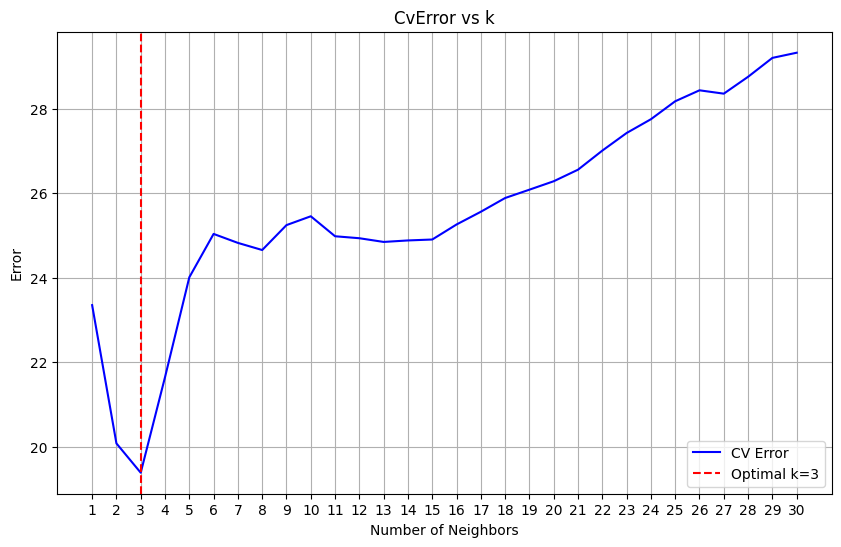

In [15]:
# Plot cross-validation error vs k
plt.figure(figsize=(10, 6))
plt.plot(k_vals, cv_errs, marker='', linestyle='-', color='b', label='CV Error')
plt.axvline(x=opt_k, color='r', linestyle='--', label=f'Optimal k={opt_k}')
plt.title('CvError vs k')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_vals)
plt.grid(True)
plt.legend()
plt.show()
